In [1]:
#from ipsl_dcpp.model.ipsl_dataset import IPSL_DCPP
import torch
import lightning as pl
#from ipsl_dcpp.model.pangu import PanguWeather
from hydra import compose, initialize
from omegaconf import OmegaConf
import numpy as np
import hydra
import os
import pickle
import io
import numpy as np
from matplotlib import animation
import xarray as xr 
#os.environ['SLURM_NTASKS_PER_NODE'] = '1'
#torch.set_default_dtype(torch.float32)
# os.environ["CUDA_VISIBLE_DEVICES"]=""
#torch.set_default_tensor_type(torch.FloatTensor)

with initialize(version_base=None, config_path="conf"):
    cfg = compose(config_name="config")
pl.seed_everything(cfg.seed)
val = hydra.utils.instantiate(
    cfg.dataloader.dataset,domain='val'
)
val_loader = torch.utils.data.DataLoader(val, 
                                            batch_size=cfg.batch_size,
                                            num_workers=cfg.cluster.cpus,
                                            shuffle=True) 


[rank: 0] Seed set to 0


torch.Size([10, 1, 1])
torch.Size([8, 3, 1, 1])


56it [00:37,  1.50it/s]


In [2]:
import xarray as xr
sample = xr.open_dataset(val.files[0])

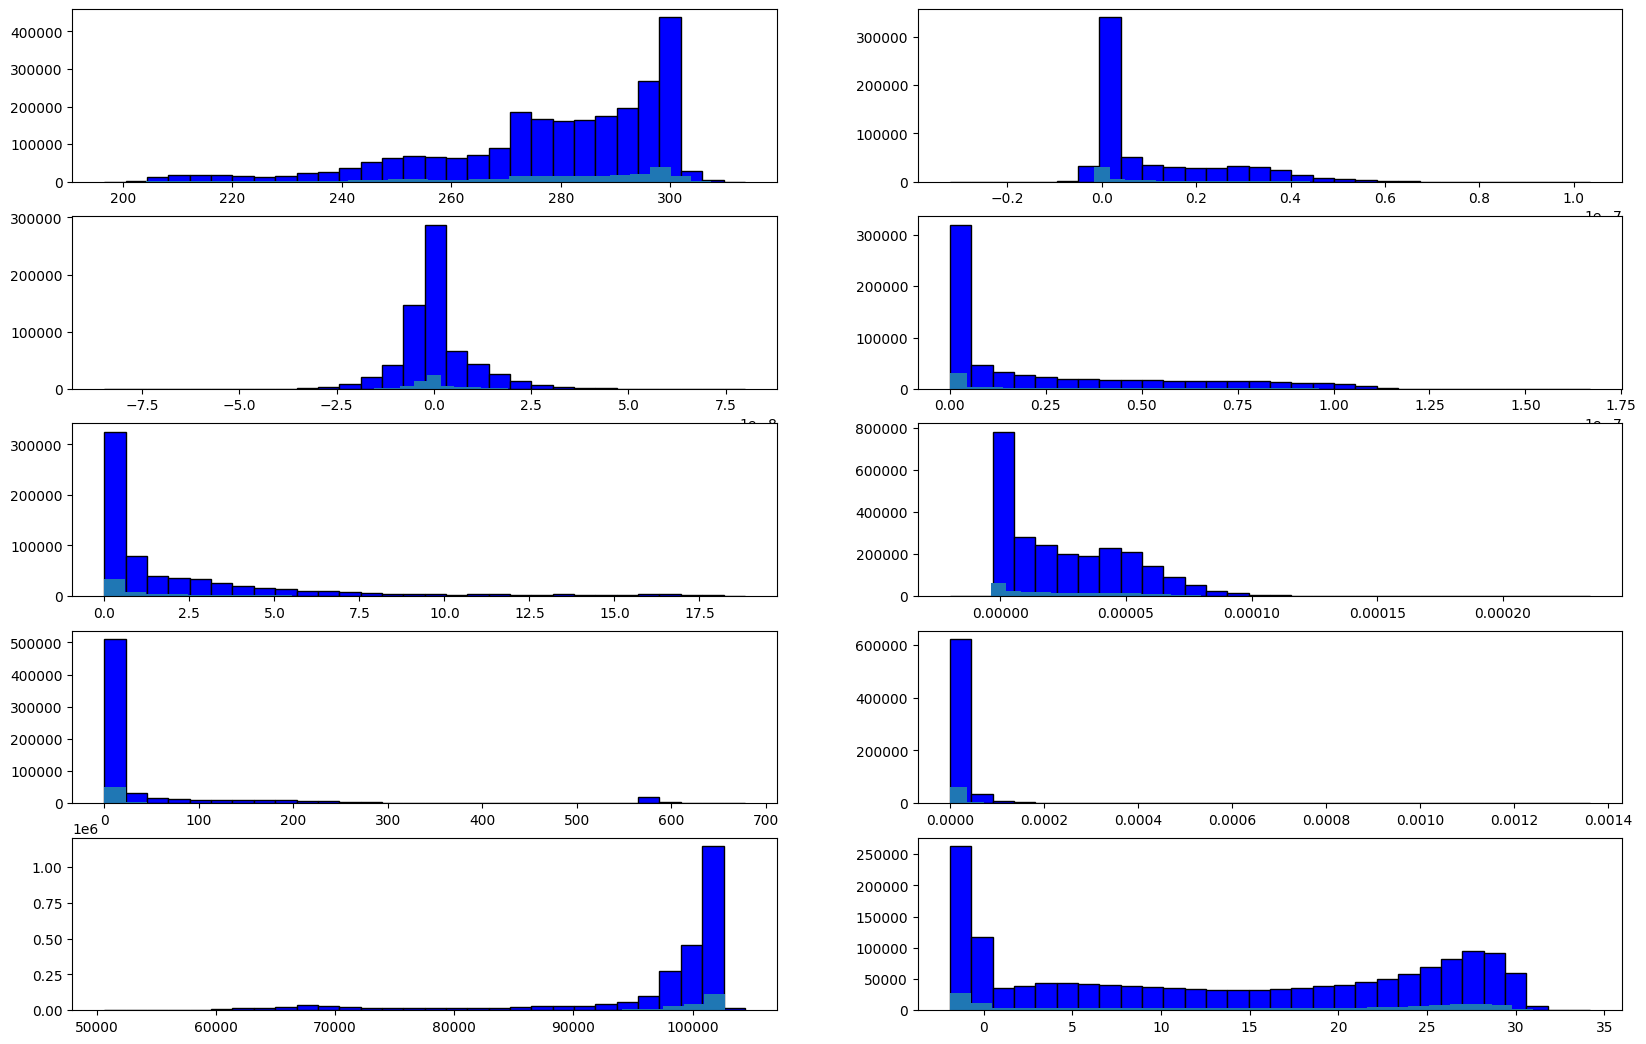

In [10]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(len(val.surface_variables)//2,2, figsize=(20, 13))
axes = axes.flatten()
for i in range (len(val.surface_variables)):
    axes[i].hist(sample[val.surface_variables[i]].data.flatten(),color='blue',ec='black',bins=30)
    axes[i].hist(val.surface_means[:,i].flatten(), bins=30)

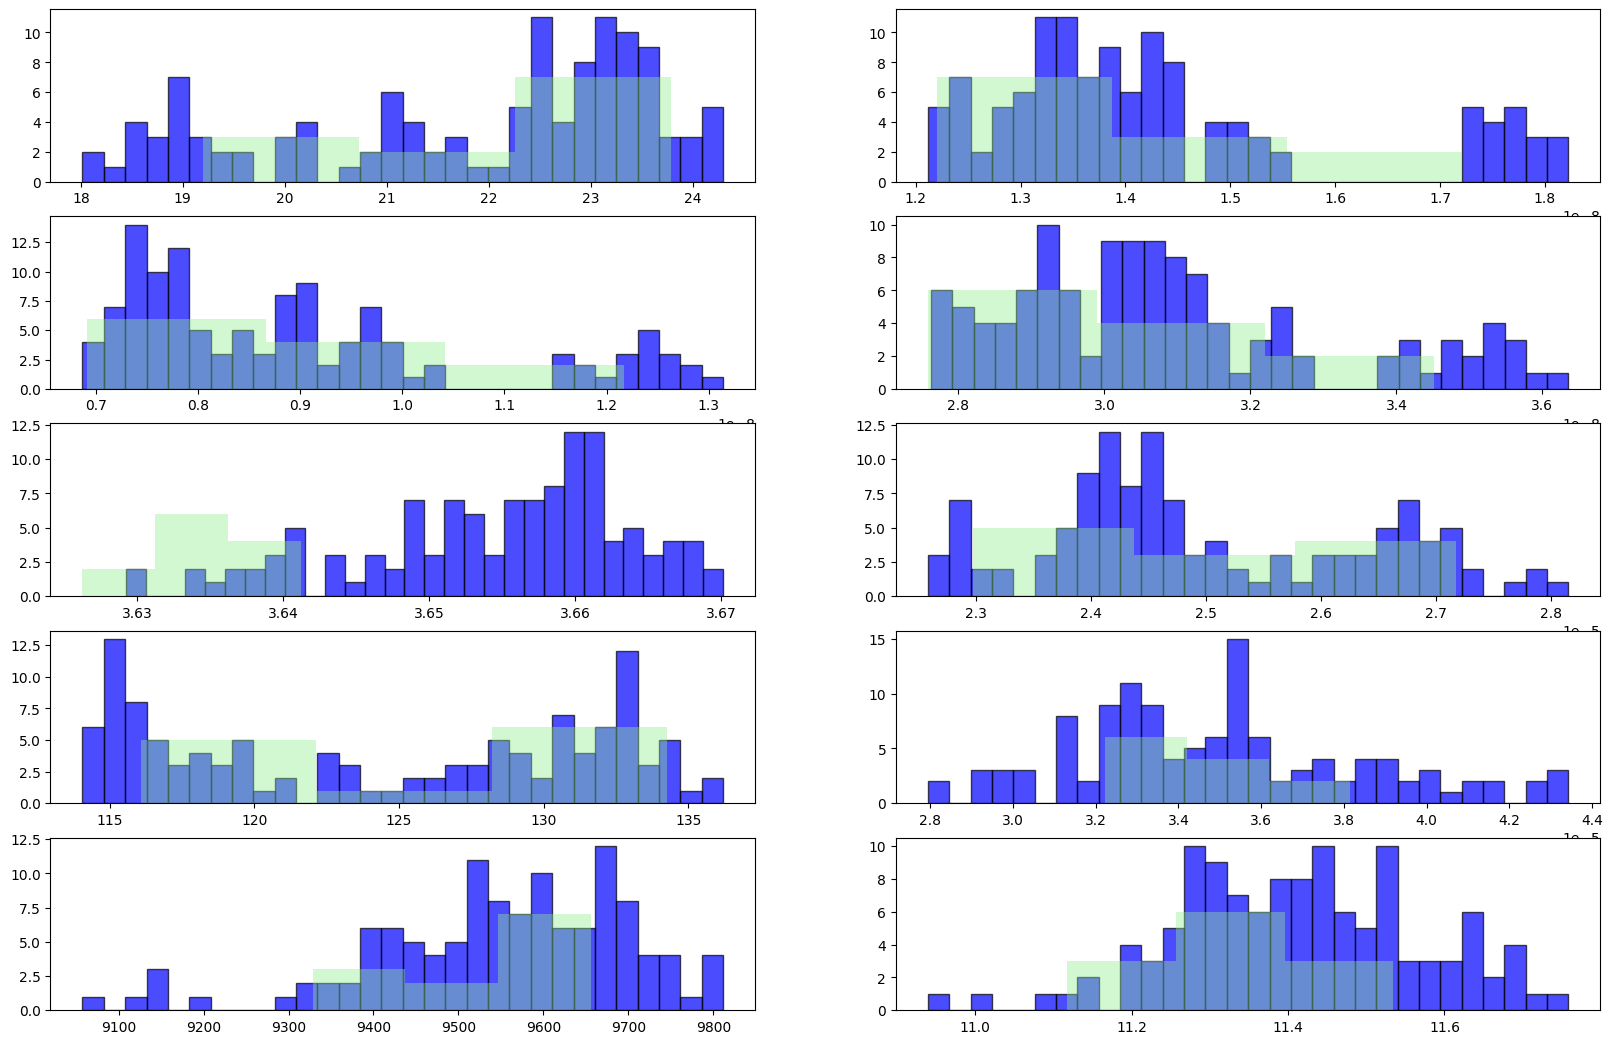

In [26]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(len(val.surface_variables)//2,2, figsize=(20, 13))
axes = axes.flatten()
for i in range (len(val.surface_variables)):
    axes[i].hist(np.nanstd(sample[val.surface_variables[i]].data,axis=(-1,-2)),color='blue',ec='black',bins=30,alpha=0.7)
    axes[i].hist(np.nanmean(val.surface_stds[:,i],axis=(-1,-2)), color='lightgreen',bins=3,alpha=0.4)

In [29]:
val.surface_delta_stds

tensor([[[0.0817]],

        [[0.0622]],

        [[0.1001]],

        [[0.0440]],

        [[0.0012]],

        [[0.2541]],

        [[0.0212]],

        [[0.1000]],

        [[0.0468]],

        [[0.0250]]])